
# Project: Which countries produce the most carbon per capita? 

How does this change by continent? Where is it increasing and descreasing at the fastest rate?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

An article a few months back in the Guardian caught my eye. It reported a study that, contrary to popular wisdom, the key changes an individual can make to reduce their carbon footprint:

* have one less child than planned
* forego driving
* eliminate meat
* reduce long-haul air travel

For this project, I'd explore some Gapminder to see for the relationships for myself, and how it varies over the world. 

Since Gapminder doesn't have data on air travel or meat consumption, I will be focusing mainly on fertility and vehicle/road data.

Also, to make sure we're comparing apples to apples, I will add region and sub-region data, and try to break along levels of health and well-being.


## About the data

Average CO2 *(or CO?)* emission in metric tons per person during the given year, calculated from deviding the total CO2 with the total population of the countries.

https://docs.google.com/spreadsheets/d/1RjqGm7RG82GGVf7E4RXPPwFF7O1So6T0SFx2fVfcUJA/pub?range=A1:D70&gid=1&output=html#

## Load data

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint as pp
%matplotlib inline

# to use seaborn styling
sns.set()

# to display interactive plots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [193]:
df = pd.read_csv('data/final/final_df.csv')
df.head()

country region     sub-region  year       CO2  energy  hdi  income  \
0  Afghanistan   Asia  Southern Asia  1949  0.001816     NaN  NaN  1030.0   
1  Afghanistan   Asia  Southern Asia  1950  0.010346     NaN  NaN  1040.0   
2  Afghanistan   Asia  Southern Asia  1951  0.011075     NaN  NaN  1060.0   
3  Afghanistan   Asia  Southern Asia  1952  0.010903     NaN  NaN  1070.0   
4  Afghanistan   Asia  Southern Asia  1953  0.012447     NaN  NaN  1120.0   

   motor  population  roads  sulfur  surviving  
0    NaN         NaN    NaN  0.0477        NaN  
1    NaN   7752118.0    NaN  0.0758       2.89  
2    NaN   7839426.0    NaN  0.0932       2.89  
3    NaN   7934798.0    NaN  0.1100       3.02  
4    NaN   8038312.0    NaN  0.1260       3.02

In [194]:
df.tail()

country  region      sub-region  year       CO2    energy    hdi  \
15067  Zimbabwe  Africa  Eastern Africa  2006  0.825535  0.770384  0.414   
15068  Zimbabwe  Africa  Eastern Africa  2007  0.818161  0.778872  0.421   
15069  Zimbabwe  Africa  Eastern Africa  2008  0.654323  0.744783  0.419   
15070  Zimbabwe  Africa  Eastern Africa  2009  0.700177  0.754557  0.436   
15071  Zimbabwe  Africa  Eastern Africa  2010  0.749873  0.764014  0.452   

       income       motor  population  roads  sulfur  surviving  
15067  1580.0         NaN  13127942.0    NaN     NaN       2.26  
15068  1490.0  105.687465  13297798.0    NaN     NaN       2.27  
15069  1210.0         NaN  13495462.0    NaN     NaN       2.28  
15070  1290.0         NaN  13720997.0    NaN     NaN       2.32  
15071  1460.0         NaN  13973897.0    NaN     NaN       2.32

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15072 entries, 0 to 15071
Data columns (total 13 columns):
country       15072 non-null object
region        15072 non-null object
sub-region    15072 non-null object
year          15072 non-null int64
CO2           15072 non-null float64
energy        5082 non-null float64
hdi           3283 non-null float64
income        13823 non-null float64
motor         439 non-null float64
population    10943 non-null float64
roads         1863 non-null float64
sulfur        10775 non-null float64
surviving     13244 non-null float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.5+ MB


Also need to get rid of rows with year values of 'region' & 'sub-region'

# Data Exploration

## What does the data look like?

## Where are the highest & lowest CO2 emissions?

## Where are they changing the most in past 10 years?

## What is the overall footprint?

## What are the correlations? How do they vary by region?

## What is the influence of outliers?

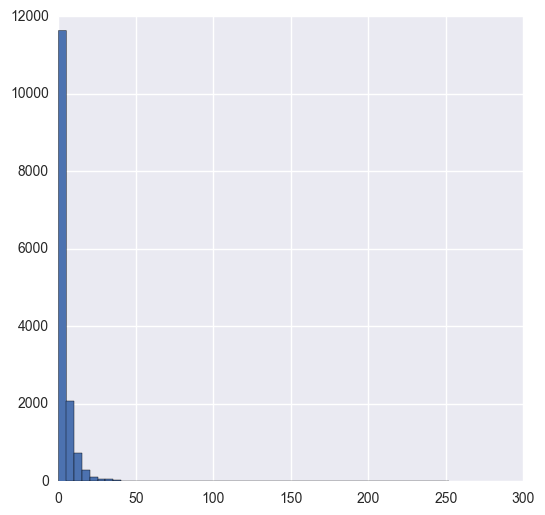

In [286]:
value = 'CO2'
df[value].hist(figsize=(6,6), bins=50); 

This is not very useful. Also, since CO2 data can go back to the 1700s, it's not all that relevant. Let's reduce the timeframe.

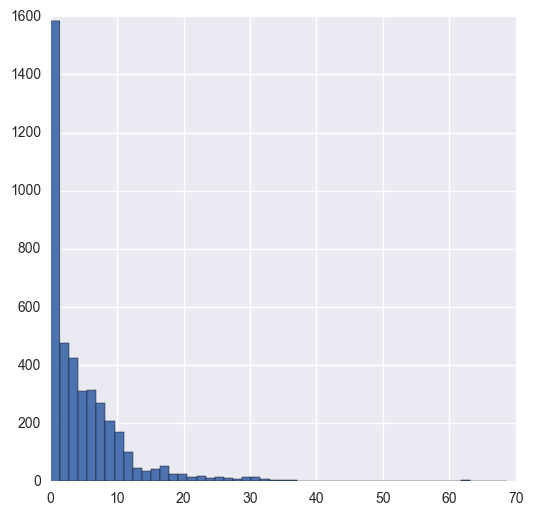

In [287]:
# CO2 dist since 1990

df.query('year >= 1990')[value].hist(figsize=(6,6), bins=50); 

Interestingly, the range of CO2 emissions has decreased. I suspect this is because coal is no longer a main fuel source.

How does this distribution vary by region?

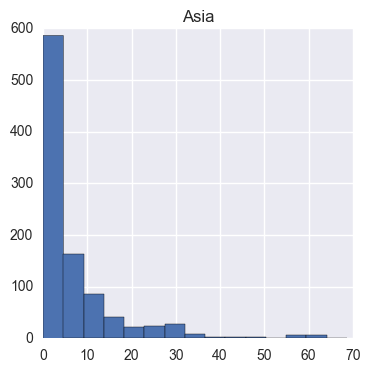

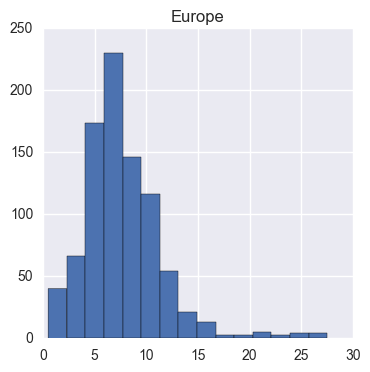

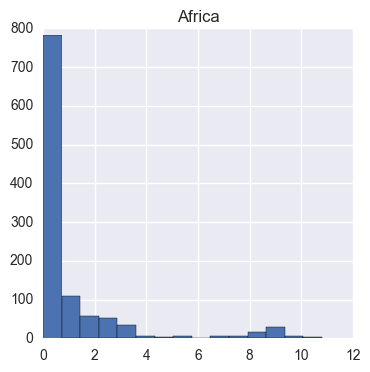

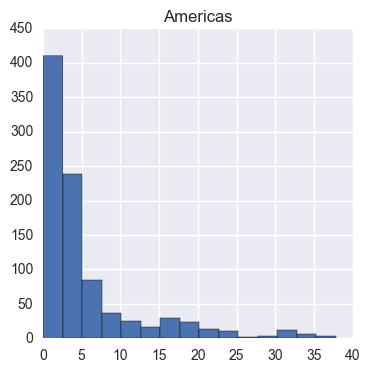

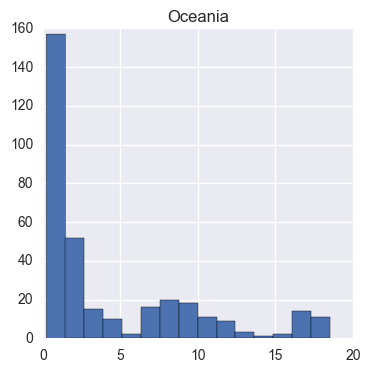

In [289]:
# plot CO2 dist by region

for region in df['region'].unique():
    df.query('year >= 1990')['CO2'].loc[df['region']==region].hist(figsize=(4,4), bins= 15)
    plt.title(region)
    plt.show(); 

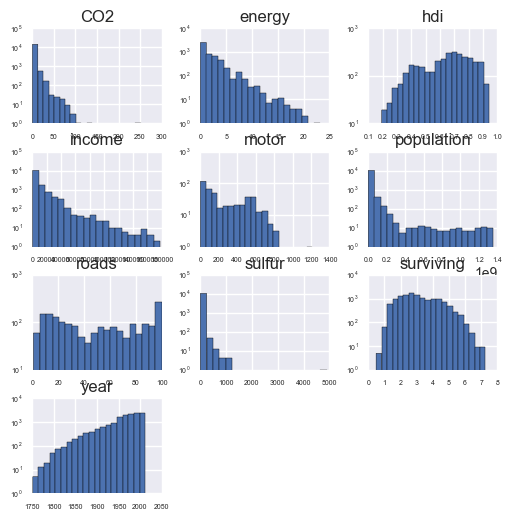

In [197]:
# use log yscale to get more detail for CO2, motor vehicles, income and sulfur

df.hist(figsize=(6,6), xlabelsize=5, ylabelsize=5, bins=20, log=True); 

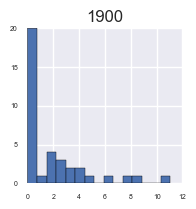

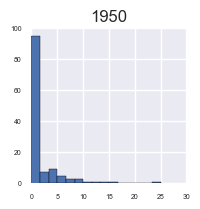

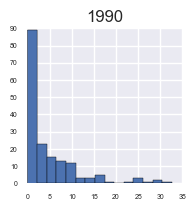

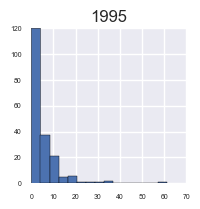

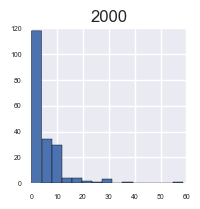

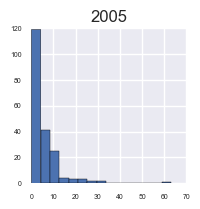

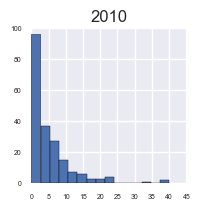

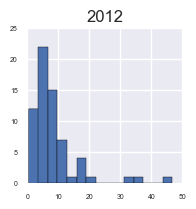

In [198]:
# of course, we're looking at time-series data. 
# let's look at things over time

years = ['1900','1950','1990','1995','2000','2005','2010','2012']
years = pd.Series(years).apply(int)
for year in years:
    df['CO2'].loc[df['year']==year].hist(figsize=(2,2), bins= 15, xlabelsize=5, ylabelsize=5)
    plt.title(year)
    plt.show(); 

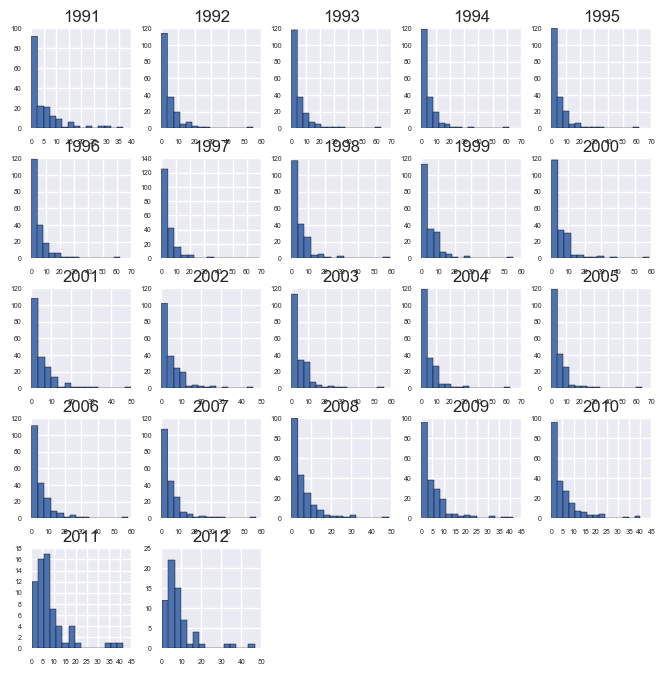

In [199]:
index = 'country'
columns = 'year'
value = 'CO2'

df.query('year > 1990').pivot(index, columns, value).\
hist(bins= 15, xlabelsize=5, ylabelsize=5, figsize=(8,8))

plt.title(value);

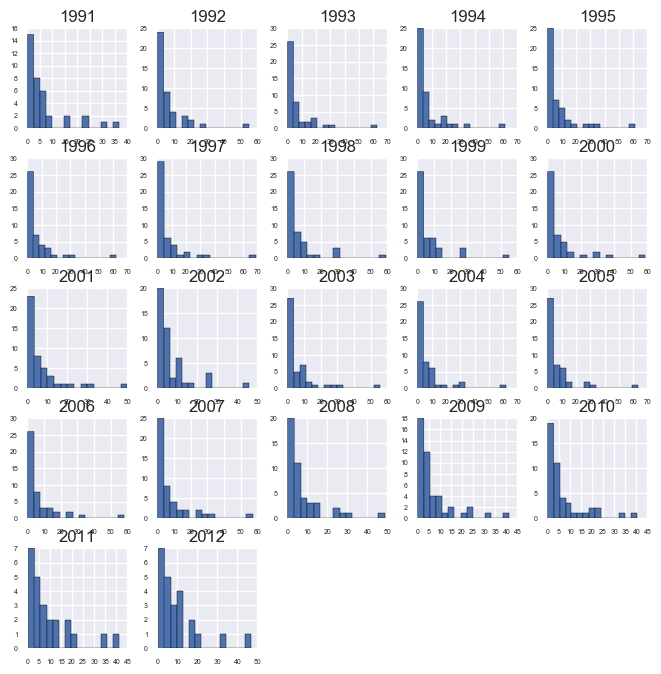

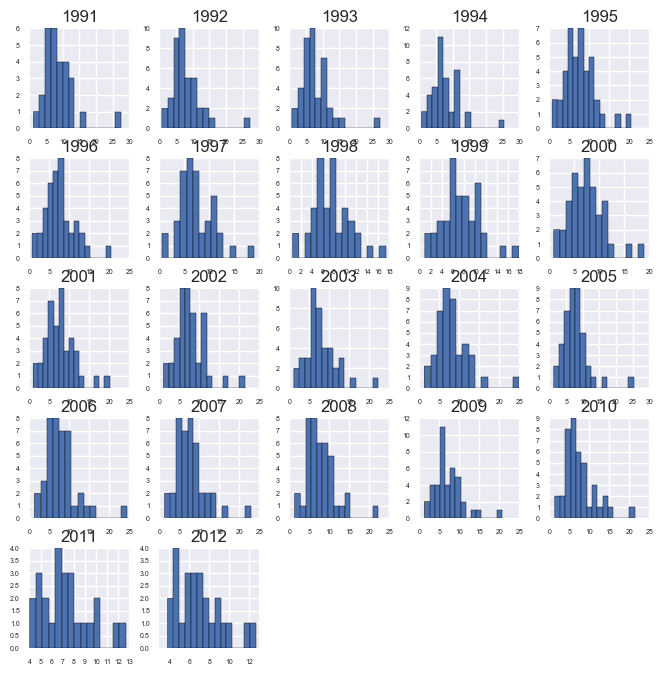

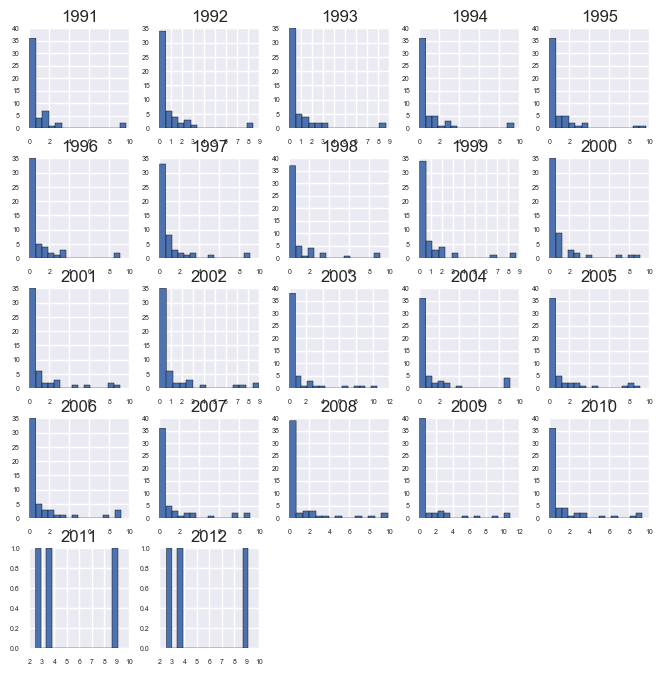

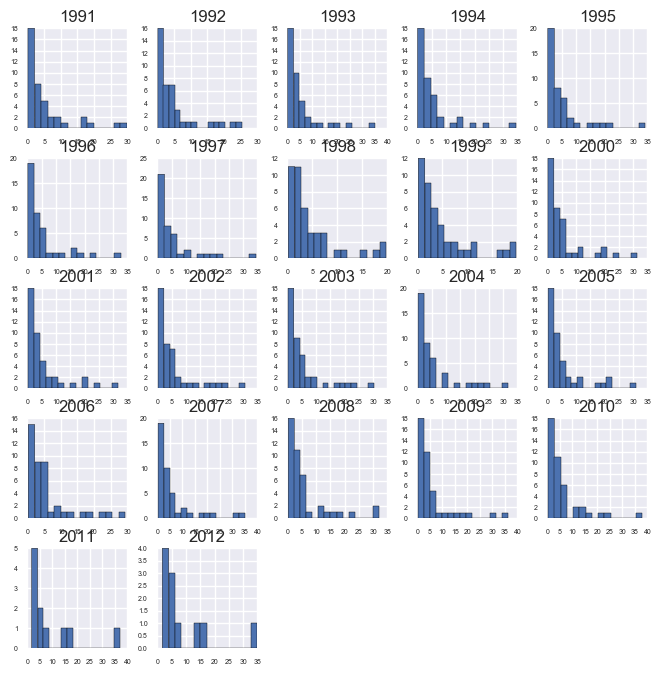

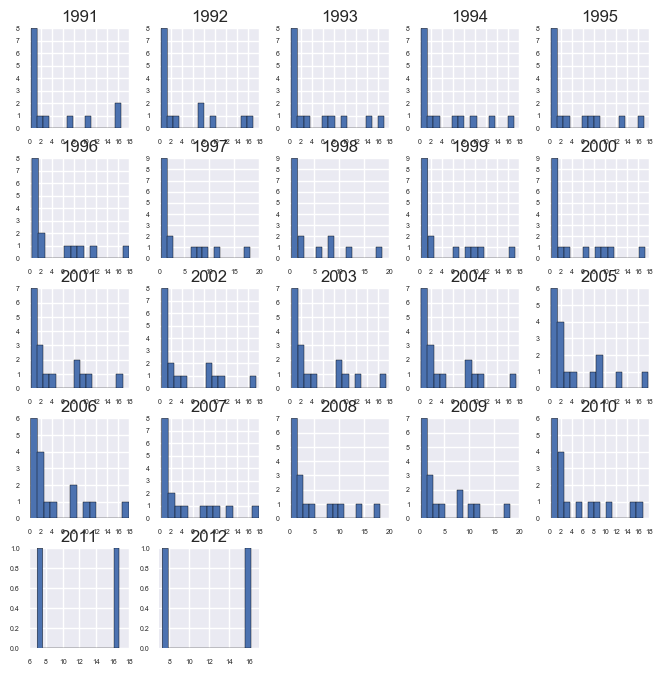

In [200]:
# how do these vary by region?

for reg in df['region'].unique():
    df.query('year > 1990 & region==@reg').\
    pivot(index, columns, value).\
    hist(bins= 15, xlabelsize=5, ylabelsize=5, figsize=(8,8))
    
    plt.title(str.upper(reg))
    plt.show();

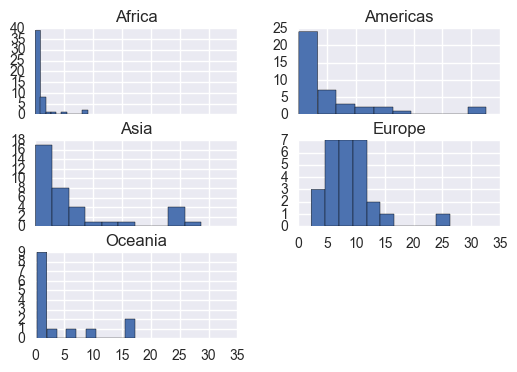

In [201]:

df.query('year==1990').\
set_index(['region', 'sub-region','country']).\
unstack(level=0)['CO2'].\
hist(sharex=True);


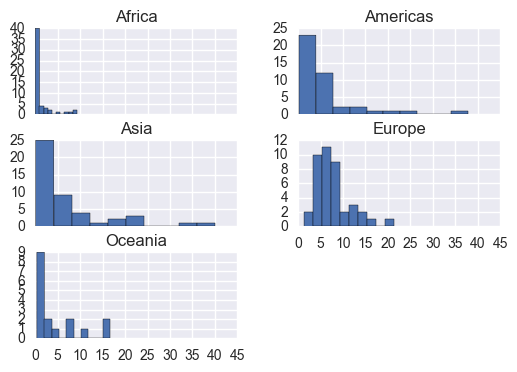

In [202]:
df.query('year==2010').\
set_index(['region', 'sub-region','country']).\
unstack(level=0)['CO2'].\
hist(sharex=True);

Since I live in Europe, I'd like to focus on CO2 emissions there first. Also, would like to focus on post-WW2 era.


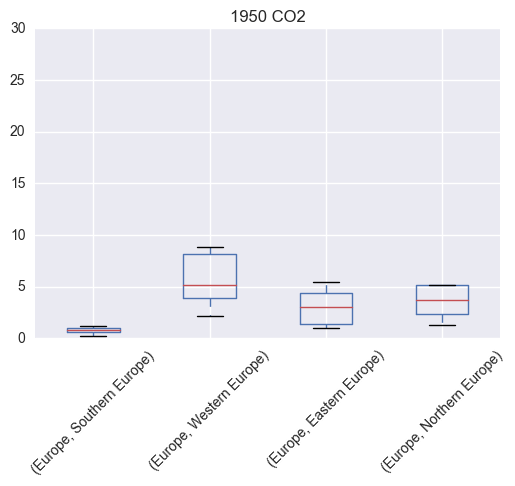

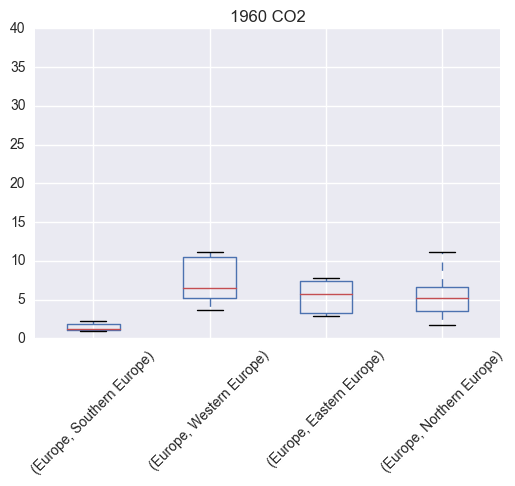

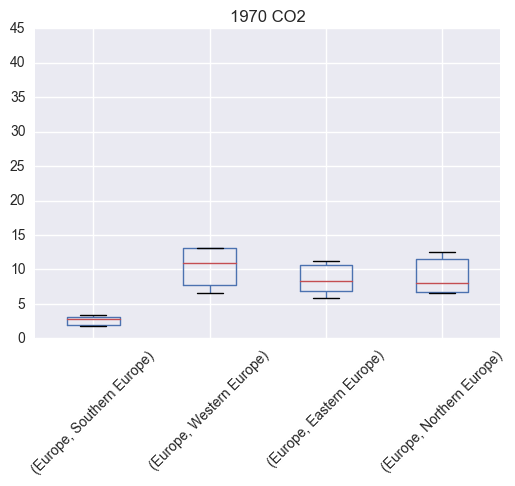

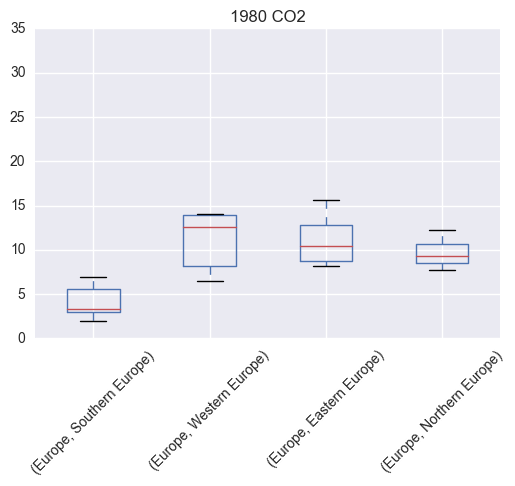

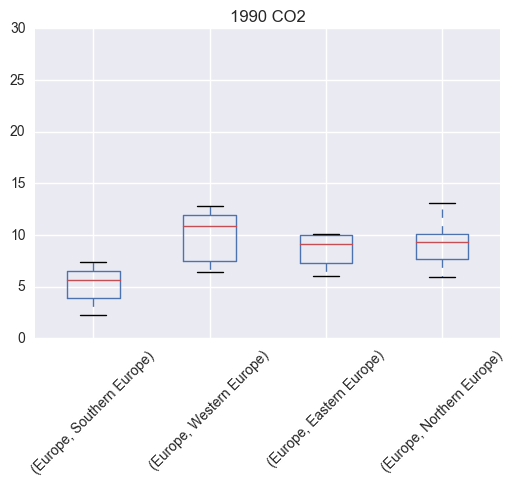

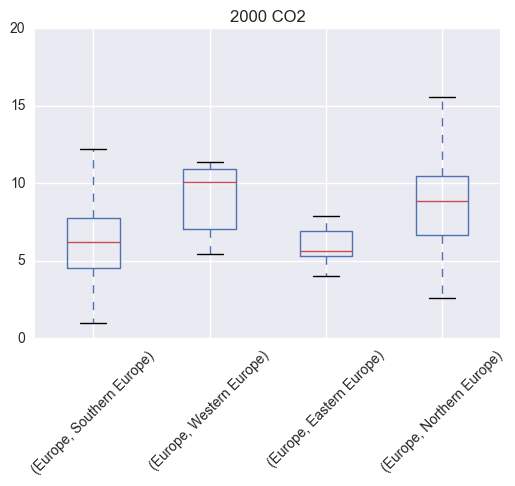

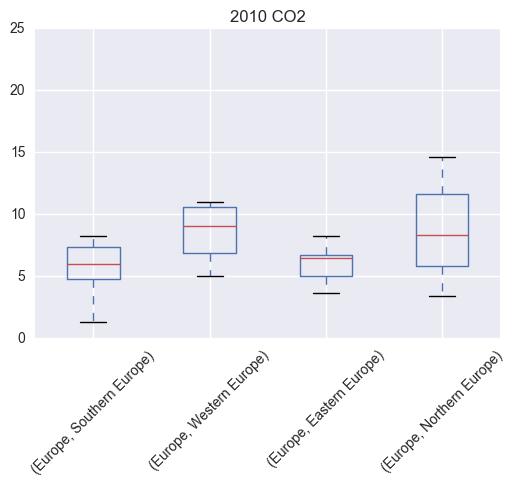

In [203]:

years = [1950,1960,1970,1980,1990,2000,2010]
for year in years:
    df.query("region=='Europe' & year==@year").\
    set_index(['region', 'sub-region','country','year'])['CO2'].\
    unstack(level=(0,1)).plot.box(rot=45)
    
    plt.title(str(year) + ' ' + value)
    plt.show();


## Pandas plotting

In [204]:
def reshape_for_pandas_faceting(df, region, value):
    
    # create multi-index and limit df to Europe
    df_region = df.reset_index().set_index(['region', 'sub-region', 'country']).loc[region]

    # transpose df & unstack years columns into single column
    df_region = pd.DataFrame(df_region.T.unstack()).reset_index().rename(columns={'level_2':'year', 0: value})

    return df_region

In [205]:
def pandas_subregion_plot(df, region, value, xlim=(1950,2010)):
    # subset df by region 
    df = df.loc[df['region']==region].copy()
    
    # create spaghetti plot of countries by sub-region
    for subreg in df['sub-region'].unique():
        df.loc[df['sub-region']==subreg].pivot('year', 'country', value).plot(xlim=xlim)
        plt.title(subreg + ' ' + value)
        
        # Put a legend to the right of the current axis
        plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

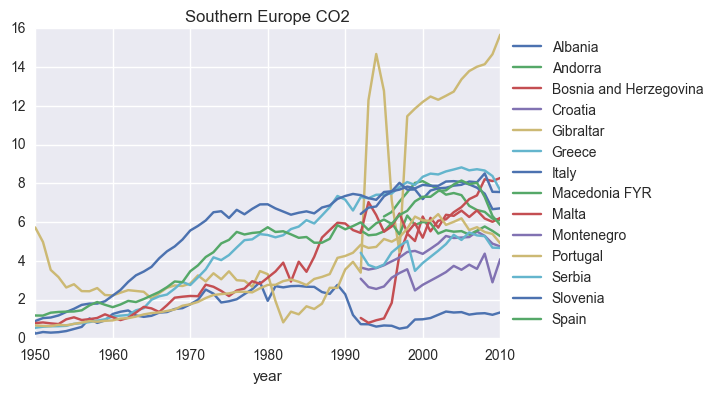

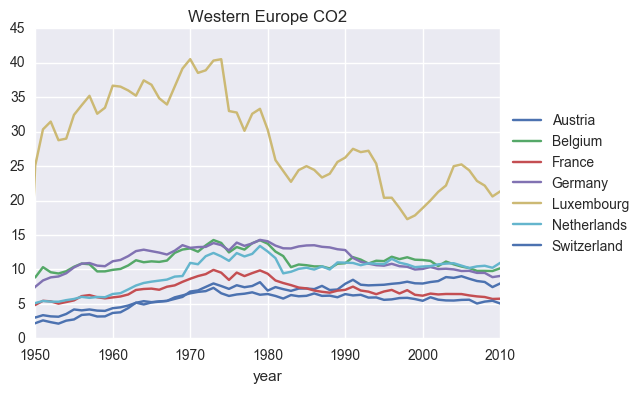

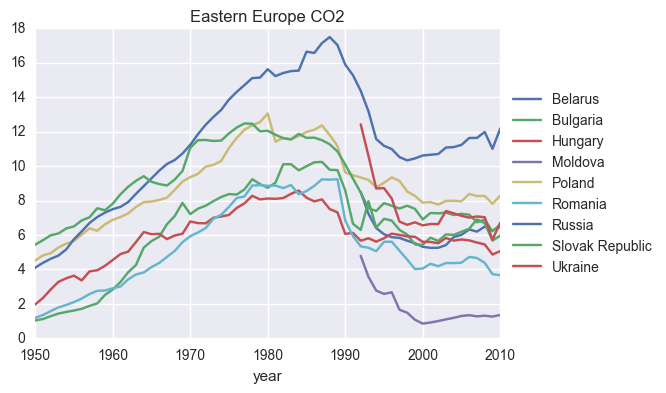

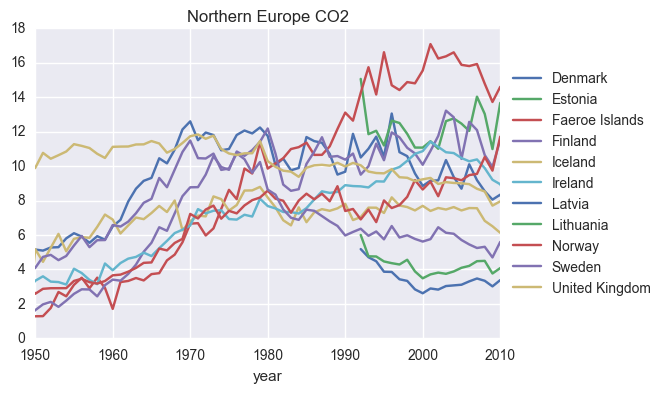

In [206]:
# plot
region = 'Europe'
value = 'CO2'
xlim = (1950,2010)

pandas_subregion_plot(df, region, value)

## Observations

### What's with Luxembourg & Gibraltar? 

How can tiny countries known for financial services produce so much per capita CO2? 
Similarly, what's going on in the Faroe Islands, another tiny country that's a bit of an outlier for CO2 emissions.

### Lots of noise in the north & south

Even after faceting by sub-region, the N. & S. Europe plots are noisy. E. Europe, made up of entirely of former USSR states, all follow the same pattern. However, some ex-Soviet countries are included instead in either Northern or Southern Europe, which may account for the noisiness. 

### Weird sub-region composition

Also, some of the sub-region compositions surprised me: for example, putting 'United Kingdom' with Northern instead of Western Europe.

### Conclusion: would like to filter sub-regions
These plots are still hard to read due to noisiness & outliers. Let's create some interactive plots.

## Plotly + cufflinks plotting

In [207]:
# create an interactive plotting function
import plotly as py
import cufflinks as cf
import plotly.tools as tls
tls.embed('https://plot.ly/~cufflinks/8')

cf.set_config_file(offline=True, world_readable=False, theme='ggplot')

In [208]:
#co2_long = reshape_for_facet_plot(co2_regions, 'Europe')
#co2_eur = reshape_for_pandas_faceting(co2_regions, region, value)

In [209]:
def plotly_line(df, title):
    fig = df.iplot(asFigure = True,\
                    title = title,\
                    yTitle = 'Metric tons per person',\
                    theme = 'ggplot')
    return fig

def plotly_subreg(df, subreg, index, column, value):
    for sub in df[subreg].unique():
        sub_df = df.loc[df[subreg]==sub].pivot(index, column, value)
        fig = plotly_line(sub_df, sub + ' ' + value)
        py.offline.iplot(fig)

In [210]:
# plot
subreg = 'sub-region'
index = 'year'
column = 'country'
value = 'CO2'

plotly_subreg(df.query("region=='Europe' & year >=1950"), subreg, index, column, value)

########## TO INTERACT WITH PLOT.LY PLOT #########
##### Hide a line: single-click corresponding legend item
##### Isolate a line: double-click legend item
##### Bring back all lines: double-click item a 2nd time
##### Select, zoom, pan: hover on upper right of plot to display toolbar

## Observations

### Eastern Europe

As I expected, since 1950 the lines for all the countries have a very similar shape, reflecting how interrelated their economies (and presumably their carbon output) were. The only difference is the amplitude (range). Again, no surprises here: Russia is consistently the top emitter, while Moldava is at the bottom.

### Northern Europe

This is a lot noisier, with two outliers: one expected (UK), the other not (Faroe Islands). 

The UK is an extreme outlier until 1970 (and in fact, the country with the most data points). For the 19th century, I'll attribute this to UK being the cradle of the industrial revolution. In the post WW2 years, I suspect this is due to reconstruction efforts and that much of the UK was powered by coal. 

The UK line goes down then flattens during the 80s. This was the Thatcher era, where coal mines were famously shut down, so not sure if that's due to lower coal production, or a slowed economy. From 1990 onwards, carbon goes steadily down: perhaps a reflection of the UK's transistion to a service-dominated economy?

As for the Faroe Islands, I have no ready hypothesis as to why its per capita CO2 output exploded from 1950 to 2000. It does, however, follow a trend I noticed in the other sub-regions: tiny countries with big p.c. CO2 output, like Luxembourg, Gibraltar, and Andorra.

As for the remaining countries, like the UK their CO2 output steadily increased during the post-WW2 boom and stagnated during the 80s. Between 1990 and 2000, though, the trajectories are quite divergent, but since 2000 the trend has been either decreasing or flatlining CO2 output. 

### Southern Europe

This sub-region is even trickier to unpack, and makes me question the wisdom of faceting by sub-region in the first palce. 

This is where Plotly's interactivity came in really handy: I could click countries on the legend to filter. I found 3 sub-groups:

#### PIGS

All 4 countries follow a similar trajectory, rapid growth from 1950 to mid 1980s, and falling off a cliff in 2008. From 2010 - 2011 (end of data set), Spain and Portugal's CO2 p.c. output stabilised, while Greece and Italy's freefall continued, again demonstrating how tied CO2 is to economic health.

On that same note, we can see how Italy's rate of CO2 output slowed down in the 1980s, while the output of the other 3 countries, after a wobble in the early 80s, grew rapidly until the early 2000s. I suspect that joining the EU provided an influx of capital that jump-started their economies: you can see for all 4 countries, there's an inflection point, about 1-2 years after joining:


In [211]:
# when did these countries join the EU?
#eu.loc[eu['country'].isin(['Portugal', 'Italy', 'Greece', 'Spain'])]

#### Ex-USSR

* Sharp decrease after 1990, corresponding to dissolution of Soviet Republic. Exception: Slovenia.
* From 1992 to 2010, relatively flat CO2 output that wasn't impacted as much by the 2008 financial crash. Exception: Bosnia-Herzagovina

In [212]:
# re-order legend based on each countries CO2 emissions

'''df_wide = df.reset_index()

colours = []
for sub in df_wide['sub-region'].unique():
    # convert subregion df to long format
    sub_df = df_wide.loc[df_wide['sub-region']==sub].pivot('year', 'country', 'value')
    
    # sort countries in desc order, based on average CO2 per capita
    sorted_sub = sub_df.reindex(sub_df.sum().sort_values(ascending = False).index, axis = 1)
    
    # save plotly figure in order to display plot in notebook
    fig = sorted_sub.iplot(asFigure = True,\
                        title = sub,\
                        yTitle = 'Metric tons per person',\
                        theme = 'ggplot')
    py.offline.iplot(fig)'''



"df_wide = df.reset_index()\n\ncolours = []\nfor sub in df_wide['sub-region'].unique():\n    # convert subregion df to long format\n    sub_df = df_wide.loc[df_wide['sub-region']==sub].pivot('year', 'country', 'value')\n    \n    # sort countries in desc order, based on average CO2 per capita\n    sorted_sub = sub_df.reindex(sub_df.sum().sort_values(ascending = False).index, axis = 1)\n    \n    # save plotly figure in order to display plot in notebook\n    fig = sorted_sub.iplot(asFigure = True,                        title = sub,                        yTitle = 'Metric tons per person',                        theme = 'ggplot')\n    py.offline.iplot(fig)"

# Observations

* The smallest countries tend to have highest avg CO2pc values, such as Luxembourg, Gibralter, Faroe Islands, Estonia and Andorra. 
* If you focus on these smaller countries, however, it looks like they have such high avergages because the history for their CO2 data is short. Better to compare sums, or take average since a recent year



# Are CO2 emissions going up or down?

In [275]:
# has CO2 emissions increased or descreased compared to 10 years earlier?
df.query("year >= 1999").set_index(['year','country']).iloc[:,2:].pct_change(10)

CO2    energy       hdi    income     motor  \
year country                                                             
1999 Afghanistan           NaN       NaN       NaN       NaN       NaN   
2000 Afghanistan           NaN       NaN       NaN       NaN       NaN   
2001 Afghanistan           NaN       NaN       NaN       NaN       NaN   
2002 Afghanistan           NaN       NaN       NaN       NaN       NaN   
2003 Afghanistan           NaN       NaN       NaN       NaN       NaN   
2004 Afghanistan           NaN       NaN       NaN       NaN       NaN   
2005 Afghanistan           NaN       NaN       NaN       NaN       NaN   
2006 Afghanistan           NaN       NaN       NaN       NaN       NaN   
2007 Afghanistan           NaN       NaN       NaN       NaN       NaN   
2008 Afghanistan           NaN       NaN       NaN       NaN       NaN   
2009 Afghanistan      4.696865       NaN  0.325444  0.558045       NaN   
2010 Afghanistan      6.672627       NaN  0.335294  0.656379       NaN   
1999 Albania         34.638694       NaN  0.923754  4.855339       NaN   
2000 Albania         66.443203       NaN  0.774799  4.160377       NaN   
2001 Albania         45.129942       NaN  0.758530  4.418182       NaN   
2002 Albania         43.189965       NaN  0.702020  4.877358       NaN   
2003 Albania         36.576669       NaN  0.681481  4.807018       NaN   
2004 Albania         27.306992       NaN  0.650602  5.051724       NaN   
2005 Albania         18.817835       NaN  0.607390  4.782946  2.835029   
2006 Albania          8.303136       NaN  0.619816  5.092308  3.266551   
2007 Albania          4.997516       NaN  0.591518  4.522876  3.481126   
2008 Albania          3.949973       NaN  0.588106  4.683230       NaN   
2009 Albania          0.250903  0.139029  0.105183  0.868627       NaN   
2010 Albania          0.358894  0.118681  0.114804  0.815356       NaN   
1999 Algeria          1.921976  0.509990 -0.050746  0.672819       NaN   
2000 Algeria          1.371928  0.363074 -0.044510  0.637239       NaN   
2001 Algeria          0.968396  0.355042 -0.041116  0.570997       NaN   
2002 Algeria          1.167582  0.299085 -0.032117  0.538462       NaN   
2003 Algeria          1.141572  0.370892 -0.033046  0.541555  0.005999   
2004 Algeria          1.256143  0.443954 -0.032717  0.489899 -0.085473   
...                        ...       ...       ...       ...       ...   
2005 Western Sahara  -0.132210       NaN       NaN       NaN       NaN   
2006 Western Sahara  -0.037818       NaN       NaN       NaN       NaN   
2007 Western Sahara  -0.066450       NaN       NaN       NaN       NaN   
2008 Western Sahara  -0.180858       NaN       NaN       NaN       NaN   
2009 Western Sahara  -0.409495       NaN       NaN       NaN       NaN   
2010 Western Sahara  -0.405580       NaN       NaN       NaN       NaN   
1999 Zambia          -0.743172 -0.100616 -0.374251 -0.576375       NaN   
2000 Zambia          -0.729172 -0.101717 -0.365269 -0.572301       NaN   
2001 Zambia          -0.701881 -0.096881 -0.351796 -0.560081       NaN   
2002 Zambia          -0.678475 -0.089647 -0.336826 -0.553971       NaN   
2003 Zambia          -0.645016 -0.083810 -0.317365 -0.535642       NaN   
2004 Zambia          -0.631350 -0.081433 -0.300898 -0.515275       NaN   
2005 Zambia          -0.600449 -0.076551 -0.282934 -0.494908       NaN   
2006 Zambia          -0.605068 -0.076178 -0.263473 -0.468432       NaN   
2007 Zambia          -0.704532 -0.099314 -0.245509 -0.439919  0.102170   
2008 Zambia          -0.668386 -0.094109 -0.224551 -0.413442       NaN   
2009 Zambia          -0.067765  0.008504  0.275120  0.471154       NaN   
2010 Zambia           0.040281  0.025714  0.280660  0.561905       NaN   
1999 Zimbabwe         5.994929  0.387050  0.002309  0.245370       NaN   
2000 Zimbabwe         5.028379  0.274108 -0.036117  0.173516       NaN   
2001 Zimbabwe         4.200828  0.236824 -0.063596  0.131579       NaN   
2002 Zimbabwe         3.971947 

In [273]:

df.query("year >= 2000").set_index(['year','country']).iloc[:,2:].pct_change(10).idxmax()

CO2           (2001, Faeroe Islands)
energy                 (2003, Libya)
hdi                    (2001, Chile)
income             (2000, Singapore)
motor               (2003, Barbados)
population           (2001, Morocco)
roads                  (2004, Chile)
sulfur             (2000, Australia)
surviving       (2000, Burkina Faso)
dtype: object

In [272]:
df.query("year >= 2000").set_index(['year','country']).iloc[:,2:].pct_change(10).idxmin()

CO2              (2007, Lesotho)
energy           (2007, Lesotho)
hdi              (2000, Burundi)
income          (2006, Ethiopia)
motor         (2006, Bangladesh)
population          (2009, Niue)
roads               (2000, Chad)
sulfur        (2000, Bangladesh)
surviving        (2001, Ukraine)
dtype: object

In [155]:
# biggest decrease from 2000 to 2010?
df.query('year==2010').iloc[df.query('year==2010')['CO2_change'].idxmin()]

IndexError: single positional indexer is out-of-bounds

In [114]:
subreg = 'sub-region'
index = 'year'
column = 'country'
value = 'CO2_change'

plotly_subreg(df.query("region=='Europe' & year >=1950"), subreg, index, column, value)

# What's causing all this noise?

Time to look at correlations with other measurements

In [299]:
df.query("region=='Europe' & year >= 1950").groupby('sub-region').corr()['CO2']

sub-region                 
Eastern Europe   CO2           1.000000
                 energy        0.860557
                 hdi           0.336084
                 income        0.518472
                 motor         0.537834
                 population    0.561847
                 roads         0.055706
                 sulfur        0.422854
                 surviving     0.030960
                 year          0.104050
Northern Europe  CO2           1.000000
                 energy        0.160917
                 hdi           0.246928
                 income        0.382609
                 motor         0.233756
                 population    0.223281
                 roads         0.272815
                 sulfur        0.384616
                 surviving    -0.342774
                 year          0.365294
Southern Europe  CO2           1.000000
                 energy        0.894244
                 hdi           0.773237
                 income        0.835041
            

## Observations

Wow, this really varies between sub-regions. Is this as true for rest of world?

In [159]:
value = 'CO2'
co2_corr = df.query('year >=1950').groupby(['region', 'sub-region']).corr()[value]
co2_corr = co2_corr.unstack(level=(0,1))

co2_corr

region             Africa                                                \
sub-region Eastern Africa Middle Africa Northern Africa Southern Africa   
CO2              1.000000      1.000000        1.000000        1.000000   
CO2_change      -0.031745      0.494372        0.397874       -0.182602   
energy           0.908207      0.905040        0.918689        0.993170   
hdi              0.709926      0.482005        0.730679        0.691427   
income           0.875492      0.834351        0.863643        0.747668   
motor            0.831323      0.806255        0.986523        0.932171   
population      -0.249704     -0.195823       -0.125821        0.950570   
roads            0.679899     -0.126191        0.125965        0.130907   
sulfur           0.292453      0.880942        0.124412        0.297000   
surviving       -0.279801     -0.053984       -0.012347       -0.339769   
year             0.240657      0.163988        0.285360        0.037128   

region                     Americas                                   \
sub-region Western Africa Caribbean Central America Northern America   
CO2              1.000000  1.000000        1.000000         1.000000   
CO2_change       0.218901  0.070209       -0.156503        -0.384914   
energy           0.554937  0.948004        0.970015         0.749368   
hdi              0.550812  0.366518        0.682009         0.032505   
income           0.627999  0.603631        0.864535         0.588949   
motor            0.704563  0.573812        0.790490         0.863726   
population       0.289311 -0.166201        0.828017         0.746047   
roads            0.299943  0.080682        0.641754         0.955545   
sulfur           0.269938  0.729729        0.395064        -0.755109   
surviving        0.243968 -0.319444       -0.438779        -0.661991   
year             0.264868  0.332292        0.442859         0.294177   

region                           Asia    ...                                \
sub-region South America Central Asia    ...    Southern Asia Western Asia   
CO2             1.000000     1.000000    ...         1.000000     1.000000   
CO2_change     -0.068477     0.513948    ...        -0.018703     0.350107   
energy          0.942726     0.963804    ...         0.955476     0.826397   
hdi             0.491993     0.904930    ...         0.628671     0.543058   
income          0.751369     0.894265    ...         0.934184     0.782188   
motor           0.680661     0.901004    ...        -0.149867     0.695221   
population     -0.063785     0.062327    ...         0.035789    -0.219987   
roads           0.750426     0.038141    ...         0.347483     0.072519   
sulfur          0.318121     0.701361    ...         0.724602     0.040665   
surviving      -0.216236    -0.708944    ...        -0.279323     0.096409   
year            0.254743     0.191970    ...         0.311480     0.117987   

region             Europe                                                 \
sub-region Eastern Europe Northern Europe Southern Europe Western Europe   
CO2              1.000000        1.000000        1.000000       1.000000   
CO2_change       0.061251        0.087209       -0.184381       0.290583   
energy           0.860557        0.160917        0.894244       0.936212   
hdi              0.336084        0.246928        0.773237      -0.227065   
income           0.518472        0.382609        0.835041       0.223259   
motor            0.537834        0.233756        0.700437       0.478472   
population       0.561847        0.223281        0.185709      -0.208240   
roads            0.055706        0.272815        0.782286      -0.000845   
sulfur           0.422854        0.384616        0.737100       0.467780   
surviving        0.030960       -0.342774       -0.670755      -0.182315   
year             0.104050        0.365294        0.663108      -0.042090   

region                       Oceania                                 
sub-region Au

In [167]:
df.query('year >= 1950').corr()['CO2'].sort_values(ascending=False)

CO2           1.000000
energy        0.837925
income        0.772481
motor         0.628480
hdi           0.563759
roads         0.443501
sulfur        0.201963
CO2_change    0.190954
year          0.130690
population   -0.015426
surviving    -0.234916
Name: CO2, dtype: float64

In a nutshell, yes. 
Ok, globally, which of these measures has the highest correlation with CO2 emissions?

## Are the regional breakdowns too arbitrary?

In some regions, there are 'gorillas' that could skew the numbers, such as the US in the Americas, or Australia for Oceania.

Instead, try grouping by living standard?

In [62]:
# which countries have the highest hdi?
hdi_ww_ranked = df.query('year >=1990').groupby('country').mean().sort_values('hdi', ascending=False)['hdi']

# create groups based on mean hdi
hdi_groups = np.split(hdi_ww_ranked.index, 3)
top_hdi, mid_hdi, bottom_hdi = hdi_groups

In [162]:
# top
df.loc[df['country'].isin(top_hdi.values)].corr()[value].sort_values(ascending=False)

CO2           1.000000
energy        0.755274
income        0.666053
year          0.375697
motor         0.295287
sulfur        0.223370
roads         0.152476
hdi           0.138996
surviving     0.138548
CO2_change    0.120365
population    0.079752
Name: CO2, dtype: float64

In [164]:
# mid
df.loc[df['country'].isin(mid_hdi.values)].corr()[value].sort_values(ascending=False)

CO2           1.000000
energy        0.934860
income        0.701003
hdi           0.425593
sulfur        0.410138
motor         0.382368
year          0.374080
roads         0.324986
CO2_change    0.046682
population    0.027502
surviving    -0.156212
Name: CO2, dtype: float64

In [165]:
# bottom
df.loc[df['country'].isin(bottom_hdi.values)].corr()[value].sort_values(ascending=False)

CO2           1.000000
energy        0.900885
motor         0.873307
income        0.840377
hdi           0.430753
sulfur        0.299459
roads         0.233646
year          0.218992
surviving     0.199495
CO2_change    0.019560
population   -0.185104
Name: CO2, dtype: float64

In [106]:

top_df = df.query('country in @top_hdi').notnull()

df.query('year==2010').iplot(kind='bubble', x='CO2', y='income', size='population', text='country',\
       xTitle='Carbon Emissions per capita', yTitle='Income per capita', categories='region',\
         title='Carbon vs Income per capita 2010')

In [108]:
df.query('year==2010').iplot(kind='bubble', x='CO2', y='energy', size='population', text='country',\
       xTitle='Carbon Emissions per capita', yTitle='Energy per capita', categories='region',\
         title='Carbon vs Energy Consumption per capita 2010')

# Step back for a global view

In [342]:
# reshape df for plotting globally

def reshape_for_plot(df, val_name):
    df = df.reset_index()
    df = df.set_index(['region', 'sub-region', 'country'])
    df = df.sort_index(level = 0)

    t = df.T
    t = t.unstack(level = 1)
    df = pd.DataFrame(t)
    
    df = df.reset_index()
    df = df.rename(columns={'level_3': 'year', 0: val_name})

    return df

In [343]:
# make long & merge for plotting

co2_long = reshape_for_plot(co2_regions, 'CO p.c.')
energy_long = reshape_for_plot(energy, 'energy p.c.')

co2_long_multi_cat = pd.merge_ordered(co2_long, energy_long, left_by='country', how = 'inner')

In [344]:
#len(co2_long_multi_cat)
final_year = energy_long['year'].iloc[len(energy_long) -1]
#final_year = int(final_year)

In [345]:
df = co2_long_multi_cat.loc[co2_long_multi_cat['year']==final_year]
plotly_group_scatter(df, group_col = 'region', x = 'energy p.c.', y = 'CO p.c.')

In [346]:
co2_long_multi_cat.head()

region      sub-region  country  year  CO p.c.  energy p.c.
0  Africa  Eastern Africa  Burundi  1751      NaN          NaN
1  Africa  Eastern Africa  Burundi  1755      NaN          NaN
2  Africa  Eastern Africa  Burundi  1762      NaN          NaN
3  Africa  Eastern Africa  Burundi  1763      NaN          NaN
4  Africa  Eastern Africa  Burundi  1764      NaN          NaN

In [350]:
df2010 = co2_long_multi_cat.loc[co2_long_multi_cat['year'] == '2010']
df2010.head()

region      sub-region   country  year   CO p.c.  energy p.c.
250  Africa  Eastern Africa   Burundi  2010  0.036742          NaN
303  Africa  Eastern Africa   Comoros  2010  0.189634          NaN
355  Africa  Eastern Africa  Djibouti  2010  0.606493          NaN
407  Africa  Eastern Africa   Eritrea  2010  0.097709     0.141716
459  Africa  Eastern Africa  Ethiopia  2010  0.078285     0.400265

In [225]:
#df2010 = df2010.reset_index()

In [226]:
#df2010.dropna(inplace = True)

In [348]:
df2010.head()

country  year   CO p.c.  energy p.c.
250   Burundi  2010  0.036742          NaN
303   Comoros  2010  0.189634          NaN
355  Djibouti  2010  0.606493          NaN
407   Eritrea  2010  0.097709     0.141716
459  Ethiopia  2010  0.078285     0.400265

In [236]:
#df2010.to_csv('data/df2010.csv')

In [237]:
#test = pd.read_csv('data/df2010.csv')

In [351]:
df2010.iplot(kind='bubble', x='CO p.c.', y='energy p.c.', size='CO p.c.', text='country',\
           xTitle='Carbon Emissions per capita', yTitle='Energy per capita', categories='region',\
             title='My Plot At Last')

## Add cars data

In [129]:
cars = pd.read_csv('data/cars_regions.csv')
cars.head()

country  region       sub-region  2002  2003  2004       2005  \
0  Afghanistan    Asia    Southern Asia   NaN   NaN   NaN        NaN   
1      Albania  Europe  Southern Europe  73.0   NaN  85.0  87.475235   
2      Algeria  Africa  Northern Africa   NaN  88.0  89.0  91.000000   
3      Andorra  Europe  Southern Europe   NaN   NaN   NaN        NaN   
4       Angola  Africa    Middle Africa   NaN   NaN   NaN        NaN   

        2006        2007  
0        NaN   22.809539  
1  97.318069  102.212411  
2        NaN         NaN  
3        NaN         NaN  
4        NaN   39.593660

In [128]:
# TODO: update reshape f'n to check for index type
type(cars.index)

NameError: name 'cars' is not defined

In [368]:
# reshape for plotting
cars.set_index('country', inplace=True)
cars.head()

region       sub-region  2002  2003  2004       2005       2006  \
country                                                                        
Afghanistan    Asia    Southern Asia   NaN   NaN   NaN        NaN        NaN   
Albania      Europe  Southern Europe  73.0   NaN  85.0  87.475235  97.318069   
Algeria      Africa  Northern Africa   NaN  88.0  89.0  91.000000        NaN   
Andorra      Europe  Southern Europe   NaN   NaN   NaN        NaN        NaN   
Angola       Africa    Middle Africa   NaN   NaN   NaN        NaN        NaN   

                   2007  
country                  
Afghanistan   22.809539  
Albania      102.212411  
Algeria             NaN  
Andorra             NaN  
Angola        39.593660

In [369]:
cars_long = reshape_for_plot(cars, 'cars p.1000')

In [370]:
cars_long.head()

region      sub-region  country  year  cars p.1000
0  Africa  Eastern Africa  Burundi  2002          NaN
1  Africa  Eastern Africa  Burundi  2003          NaN
2  Africa  Eastern Africa  Burundi  2004          NaN
3  Africa  Eastern Africa  Burundi  2005          NaN
4  Africa  Eastern Africa  Burundi  2006          NaN

# Automate joining of DFs

In [125]:
def join_df_slices(df_list, year):
    join_df_list = np.array()
    #for i, df in enumerate(df_list):
    for i, df in np.ndenumerate(df_list):
        if i==0:
            left_df = df[df['year']==year]
            left_df.set_index('country', inplace=True)
        else: 
            join_df = df[df['year']==year]
            join_df.set_index('country', inplace=True)
            join_df = join_df.iloc[:,[-1]]
            join_df_list.append(join_df)
     
    joined_df = left_df.join(join_df_list, how='outer', sort=False)
    joined_df.reset_index(inplace=True)
    joined_df.rename(columns={'index': 'country'}, inplace=True)
    joined_df.dropna(inplace=True)
    return joined_df
    

In [126]:
df_list = np.array(co2_long, energy_long, cars_long)
year = '2007'

df2007 = join_df_slices(df_list, year)


NameError: name 'energy_long' is not defined

In [498]:
df2007.iplot(kind='bubble', x='CO p.c.', y='cars p.1000', size='CO p.c.', text='country',\
           xTitle='Carbon Emissions per capita', yTitle='Cars per 1000 population', categories='region',\
             title='Carbon Emissions vs Car Ownership for ' + year)

In [270]:
#df_list = [cars_long, co2_long, energy_long]
#year = '2007'

cars2007 = cars_long[cars_long['year']=='2007']
co2007 = co2_long[co2_long['year']=='2007']
energy2007 = energy_long[energy_long['year']=='2007']

In [278]:
df = pd.merge_ordered(co2007, energy2007, left_by='country', how = 'left')

In [279]:
df2007 = pd.merge_ordered(df, cars2007, left_by='country', how='left')
df2007.head()

region      sub-region   country  year   CO p.c.  energy p.c.  cars p.1000
0  Africa  Eastern Africa   Burundi  2007  0.024737          NaN     5.671392
1  Africa  Eastern Africa   Comoros  2007  0.178308     0.060418    33.473369
2  Africa  Eastern Africa  Djibouti  2007  0.580934     0.170349          NaN
3  Africa  Eastern Africa   Eritrea  2007  0.120731     0.150176    11.310753
4  Africa  Eastern Africa  Ethiopia  2007  0.076099     0.392598     2.995806

In [280]:
df2007.head()

region      sub-region   country  year   CO p.c.  energy p.c.  cars p.1000
0  Africa  Eastern Africa   Burundi  2007  0.024737          NaN     5.671392
1  Africa  Eastern Africa   Comoros  2007  0.178308     0.060418    33.473369
2  Africa  Eastern Africa  Djibouti  2007  0.580934     0.170349          NaN
3  Africa  Eastern Africa   Eritrea  2007  0.120731     0.150176    11.310753
4  Africa  Eastern Africa  Ethiopia  2007  0.076099     0.392598     2.995806

In [539]:
df2007.iplot(kind='bubble', x='CO p.c.', y='cars p.1000', size='CO p.c.', text='country',\
           xTitle='Carbon Emissions per capita', yTitle='Cars per 1000 population', categories='region',\
             title='Carbon Emissions vs Car Ownership - 2007')

## Add population data

In [502]:
pop = pd.read_csv('data/cleaned/pop_regions.csv')
pop.head()

country  region       sub-region       1800       1810       1820  \
0  Afghanistan    Asia    Southern Asia  3280000.0  3280000.0  3323519.0   
1      Albania  Europe  Southern Europe   410445.0   423591.0   438671.0   
2      Algeria  Africa  Northern Africa  2503218.0  2595056.0  2713079.0   
3      Andorra  Europe  Southern Europe     2654.0     2654.0     2700.0   
4       Angola  Africa    Middle Africa  1567028.0  1567028.0  1597530.0   

        1830       1840       1850       1860     ...            2006  \
0  3448982.0  3625022.0  3810047.0  3973968.0     ...      25183615.0   
1   457234.0   478227.0   506889.0   552800.0     ...       3050741.0   
2  2880355.0  3082721.0  3299305.0  3536468.0     ...      33749328.0   
3     2835.0     3026.0     3230.0     3436.0     ...         83373.0   
4  1686390.0  1813100.0  1949329.0  2110747.0     ...      18541467.0   

         2007        2008        2009        2010        2011        2012  \
0  25877544.0  26528741.0  27207291.0  27962207.0  28809167.0  29726803.0   
1   3010849.0   2968026.0   2929886.0   2901883.0   2886010.0   2880667.0   
2  34261971.0  34811059.0  35401790.0  36036159.0  36717132.0  37439427.0   
3     84878.0     85616.0     85474.0     84419.0     82326.0     79316.0   
4  19183907.0  19842251.0  20520103.0  21219954.0  21942296.0  22685632.0   

         2013        2014        2015  
0  30682500.0  31627506.0  32526562.0  
1   2883281.0   2889676.0   2896679.0  
2  38186135.0  38934334.0  39666519.0  
3     75902.0     72786.0     70473.0  
4  23448202.0  24227524.0  25021974.0  

[5 rows x 84 columns]

In [503]:
pop.set_index('country', inplace = True)
pop_long = reshape_for_plot(pop, 'total pop')
pop_long.head()

region      sub-region  country  year  total pop
0  Africa  Eastern Africa  Burundi  1800   899097.0
1  Africa  Eastern Africa  Burundi  1810   899097.0
2  Africa  Eastern Africa  Burundi  1820   917804.0
3  Africa  Eastern Africa  Burundi  1830   972428.0
4  Africa  Eastern Africa  Burundi  1840  1050588.0

In [504]:
df_list = [co2_long, energy_long, cars_long, pop_long]
year = '2007'

df2007 = join_df_slices(df_list, year)

In [527]:
for region in df2007['region'].unique():
    print('\n')
    print(region)
    print(df2007[df2007['region']==region].corr())



Europe
              CO p.c.  energy p.c.  cars p.1000  total pop
CO p.c.      1.000000     0.496078     0.315545   0.138260
energy p.c.  0.496078     1.000000     0.579359  -0.015366
cars p.1000  0.315545     0.579359     1.000000   0.065142
total pop    0.138260    -0.015366     0.065142   1.000000


Africa
              CO p.c.  energy p.c.  cars p.1000  total pop
CO p.c.      1.000000     0.962502     0.867244  -0.071292
energy p.c.  0.962502     1.000000     0.864169   0.015114
cars p.1000  0.867244     0.864169     1.000000  -0.218383
total pop   -0.071292     0.015114    -0.218383   1.000000


Americas
              CO p.c.  energy p.c.  cars p.1000  total pop
CO p.c.      1.000000     0.995028     0.677928   0.261923
energy p.c.  0.995028     1.000000     0.660157   0.242593
cars p.1000  0.677928     0.660157     1.000000   0.625583
total pop    0.261923     0.242593     0.625583   1.000000


Asia
              CO p.c.  energy p.c.  cars p.1000  total pop
CO p.c.      1.00000

In [544]:
for region in df2007['region'].unique():
    print '\n'
    print region
    df = df2007[df2007['region']==region]
    for subreg in df['sub-region'].unique():
        print '\n'
        print subreg
        print df[df['sub-region']==subreg].corr()



Europe


Southern Europe
              CO p.c.  energy p.c.  cars p.1000  total pop
CO p.c.      1.000000     0.787013     0.463076   0.381190
energy p.c.  0.787013     1.000000     0.719035   0.502104
cars p.1000  0.463076     0.719035     1.000000   0.605719
total pop    0.381190     0.502104     0.605719   1.000000


Western Europe
              CO p.c.  energy p.c.  cars p.1000  total pop
CO p.c.      1.000000     0.971088    -0.556718  -0.340257
energy p.c.  0.971088     1.000000    -0.607507  -0.407466
cars p.1000 -0.556718    -0.607507     1.000000   0.829300
total pop   -0.340257    -0.407466     0.829300   1.000000


Eastern Europe
              CO p.c.  energy p.c.  cars p.1000  total pop
CO p.c.      1.000000     0.926487     0.356036   0.782418
energy p.c.  0.926487     1.000000     0.201908   0.738128
cars p.1000  0.356036     0.201908     1.000000  -0.080740
total pop    0.782418     0.738128    -0.080740   1.000000


Northern Europe
              CO p.c.  energy p.c.  

In [559]:
df = df2007[df2007['region']=='Europe']

In [560]:
for subreg in df['sub-region'].unique():
    print  
    print subreg
    print df[df['sub-region']==subreg].corr()



Southern Europe
              CO p.c.  energy p.c.  cars p.1000  total pop
CO p.c.      1.000000     0.787013     0.463076   0.381190
energy p.c.  0.787013     1.000000     0.719035   0.502104
cars p.1000  0.463076     0.719035     1.000000   0.605719
total pop    0.381190     0.502104     0.605719   1.000000


Western Europe
              CO p.c.  energy p.c.  cars p.1000  total pop
CO p.c.      1.000000     0.971088    -0.556718  -0.340257
energy p.c.  0.971088     1.000000    -0.607507  -0.407466
cars p.1000 -0.556718    -0.607507     1.000000   0.829300
total pop   -0.340257    -0.407466     0.829300   1.000000


Eastern Europe
              CO p.c.  energy p.c.  cars p.1000  total pop
CO p.c.      1.000000     0.926487     0.356036   0.782418
energy p.c.  0.926487     1.000000     0.201908   0.738128
cars p.1000  0.356036     0.201908     1.000000  -0.080740
total pop    0.782418     0.738128    -0.080740   1.000000


Northern Europe
              CO p.c.  energy p.c.  cars p.10

In [540]:
#for region in df2007['region'].unique():

df2007.iplot(kind='bubble', x='CO p.c.', y='energy p.c.', size='total pop', text='country',\
       xTitle='Carbon Emissions per capita', yTitle='Energy Consumption per capita', categories='region',\
         title='Carbon vs Energy Consumption per capita - ' + year)

In [299]:
for region in df2007['region'].unique():

    df2007[df2007['region']==region].iplot(kind='bubble', x='energy p.c.', y='cars p.1000', size='total pop', text='country',\
           xTitle='Energy Consumption per capita', yTitle='Cars per 1000 population', categories='sub-region',\
             title=region + ' 2007')

# How important is EU membership?

In [137]:
eu = pd.read_csv('data/EU_countries.csv')
eu.rename(columns = {'Countries': 'country'}, inplace = True)
eu

EU_entry         country
0       1958         Belgium
1       1958          France
2       1958         Germany
3       1958           Italy
4       1958      Luxembourg
5       1958     Netherlands
6       1973         Denmark
7       1973         Ireland
8       1973  United Kingdom
9       1981          Greece
10      1986        Portugal
11      1986           Spain
12      1995         Austria
13      1995         Finland
14      1995          Sweden
15      2004          Cyprus
16      2004  Czech Republic
17      2004         Estonia
18      2004         Hungary
19      2004          Latvia
20      2004       Lithuania
21      2004           Malta
22      2004          Poland
23      2004        Slovakia
24      2004        Slovenia
25      2007        Bulgaria
26      2007         Romania
27      2013         Croatia

In [118]:
eu_members = list(eu['country'])

In [130]:
# Compare EU vs non-EU member countries
    
def plotly_eu(df, index, column, value, eu_list):
    q = 'country in @eu_members'
    n = 'country not in @eu_members'

    eu = df.query(q)
    not_eu = df.query(n)
    
    eu = eu.pivot(index, column, value)
    not_eu= not_eu.pivot(index, column, value)

    fig1 = plotly_line(eu, q)
    fig2 = plotly_line(not_eu, n)
    
    py.offline.iplot(fig1)
    py.offline.iplot(fig2)
    


In [131]:
plotly_eu(energy_eur, 'year', 'country', 'value', eu_members)

In [92]:
df.head()

year sub-region   country  value
0  1751  Caribbean  Anguilla    NaN
1  1755  Caribbean  Anguilla    NaN
2  1762  Caribbean  Anguilla    NaN
3  1763  Caribbean  Anguilla    NaN
4  1764  Caribbean  Anguilla    NaN

In [98]:

plotly_eu(df, 'year', 'country', 'value', eu_list)

In [58]:
fig = eu.iplot(asFigure = True,\
                            title = sub,\
                            yTitle = 'Metric tons per person',\
                            theme = 'ggplot')
py.offline.iplot(fig)

year      sub-region      country     value
52    1960  Eastern Europe     Bulgaria       NaN
53    1961  Eastern Europe     Bulgaria       NaN
54    1962  Eastern Europe     Bulgaria       NaN
55    1963  Eastern Europe     Bulgaria       NaN
56    1964  Eastern Europe     Bulgaria       NaN
57    1965  Eastern Europe     Bulgaria       NaN
58    1966  Eastern Europe     Bulgaria       NaN
59    1967  Eastern Europe     Bulgaria       NaN
60    1968  Eastern Europe     Bulgaria       NaN
61    1969  Eastern Europe     Bulgaria       NaN
62    1970  Eastern Europe     Bulgaria       NaN
63    1971  Eastern Europe     Bulgaria  2.228687
64    1972  Eastern Europe     Bulgaria  2.262787
65    1973  Eastern Europe     Bulgaria  2.378254
66    1974  Eastern Europe     Bulgaria  2.463244
67    1975  Eastern Europe     Bulgaria  2.665459
68    1976  Eastern Europe     Bulgaria  2.780332
69    1977  Eastern Europe     Bulgaria  2.954267
70    1978  Eastern Europe     Bulgaria  3.084452
71    1979  Eastern Europe     Bulgaria  3.200499
72    1980  Eastern Europe     Bulgaria  3.203610
73    1981  Eastern Europe     Bulgaria  3.185510
74    1982  Eastern Europe     Bulgaria  3.309206
75    1983  Eastern Europe     Bulgaria  3.370132
76    1984  Eastern Europe     Bulgaria  3.387274
77    1985  Eastern Europe     Bulgaria  3.419768
78    1986  Eastern Europe     Bulgaria  3.450942
79    1987  Eastern Europe     Bulgaria  3.411073
80    1988  Eastern Europe     Bulgaria  3.488293
81    1989  Eastern Europe     Bulgaria  3.426942
...    ...             ...          ...       ...
1946  1982  Western Europe  Netherlands  3.785116
1947  1983  Western Europe  Netherlands  3.935957
1948  1984  Western Europe  Netherlands  4.147702
1949  1985  Western Europe  Netherlands  4.184430
1950  1986  Western Europe  Netherlands  4.317316
1951  1987  Western Europe  Netherlands  4.387671
1952  1988  Western Europe  Netherlands  4.321101
1953  1989  Western Europe  Netherlands  4.323858
1954  1990  Western Europe  Netherlands  4.393204
1955  1991  Western Europe  Netherlands  4.602644
1956  1992  Western Europe  Netherlands  4.501661
1957  1993  Western Europe  Netherlands  4.508460
1958  1994  Western Europe  Netherlands  4.509469
1959  1995  Western Europe  Netherlands  4.576470
1960  1996  Western Europe  Netherlands  4.728194
1961  1997  Western Europe  Netherlands  4.579475
1962  1998  Western Europe  Netherlands  4.599694
1963  1999  Western Europe  Netherlands  4.519164
1964  2000  Western Europe  Netherlands  4.597828
1965  2001  Western Europe  Netherlands  4.712300
1966  2002  Western Europe  Netherlands  4.687982
1967  2003  Western Europe  Netherlands  4.807931
1968  2004  Western Europe  Netherlands  4.856639
1969  2005  Western Europe  Netherlands  4.829936
1970  2006  Western Europe  Netherlands  4.700183
1971  2007  Western Europe  Netherlands  4.843796
1972  2008  Western Europe  Netherlands  4.837167
1973  2009  Western Europe  Netherlands  4.729160
1974  2010  Western Europe  Netherlands  5.020998
1975  2011  Western Europe  Netherlands  4.644802

[1352 rows x 4 columns]

## testing multi-index

In [14]:
len(co2_regions)

201

In [15]:
#co2_regions = co2_regions.drop(['level_0', 'index'], axis = 1)

In [15]:
#arrays = [[1, 1, 2, 2], ['red', 'blue', 'red', 'blue']]
idx = pd.MultiIndex.from_arrays(arrays)
test = pd.Series(np.random.randn(len(co2_regions)), index = idx )



NameError: name 'arrays' is not defined

In [ ]:
len(idx)

In [ ]:
test_sorted = test.sort_index(level = 0, ascending = False)
pd.DataFrame(test_sorted)

In [ ]:

test = pd.DataFrame(co2_regions.loc[['1751' : '2012'], index = arrays)
test.head()

In [ ]:
# plot a tidy/long df of co2_regions

import seaborn as sns

sns.set(color_codes = True)
#sns.set_style({'axes.linewidth': '0.5'})


co2_regions.year = pd.Categorical(co2_regions.year, ordered = True)

#p = sns.factorplot(x = 'year', y = 'value', hue = 'country', 
#               col = 'sub-region', sharey = False, 
#                   data = co2_regions[co2_regions.region == 'Europe'])

#p.set_xticklabels(rotation=45)
#p.set(ylim=(0,None))

eur_subreg = co2_regions[co2_regions.region == 'Europe']['sub-region'].unique()


co2_regions.loc[co2_regions['sub-region'].isin(eur_subreg)].country.unique()

np.arange(int(co2_regions.year.min()), int(co2_regions.year.max()), 10.)

eur_subreg

co2_regions[co2_regions['sub-region'].isin(eur_subreg)].groupby(['sub-region', 'country']).sum()

In [ ]:
# get a better legend?

for subreg in eur_subreg:
    df = co2_regions[co2_regions['sub-region'] == subreg]
    fignum = pd.Index(eur_subreg).get_loc(subreg)
    plt.figure(fignum)
    
    ax = sns.pointplot(x = 'year', y = 'value', hue = 'country', 
                   col = subreg, data = df, scale = .5)
    ax.legend(loc = 0)
    ax.set(ylim=(0,None))
    ax.set(xlim=(1950,None))
    #plt.xticks(np.arange(int(co2_regions.year.min()), int(co2_regions.year.max()), 10.))
    #ax.set_xticklabels(rotation=45)
    plt.title(subreg)
    

# which countries had no corresponding regional info
co2_totals = co2_regions[co2_regions.region.isnull()].groupby('country').sum()
co2_totals

In [ ]:
def remove_special_char(s):
    clean_s = re.sub('\W+',' ', s)
    return clean_s
    

names_cleaned = regions['name'].apply(remove_special_char)
names_cleaned_list = names_cleaned.str.split()
connector_words = ['and', 'et', 'of', 'the']

for l in names_cleaned_list:
    new_list = []
    for word in l:
        if word in connector_words:
            l.remove(word)
        else:
            pass
    new_list.append(l)
    print l
       


In [ ]:
import seaborn as sns

sns.set(color_codes = True)
#sns.set_style({'axes.linewidth': '0.5'})


co2_my_countries_long.year = pd.Categorical(co2_my_countries_long.year, ordered = True)



p = sns.factorplot(x = 'year', y = 'value', hue = 'country', 
               row = 'region', size = 6, data = co2_my_countries_long)

p.set_xticklabels(rotation=45)
p.set(ylim=(0,None))


co2_my_countries_long.groupby(['sub-region', 'country']).describe()

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!